## **Lab 11**:  Ehab, subset sum and eight queens problems


* ###  Brayan Rolando Jr Portela Cabrera 
* ###   Kevin Leonardo Alvarez Mora
* ###  Christian Camilo Pabon Useche

### **Group:** 2-28


## **a)** Solve Ehab and another construction problem  from Complete Search in Vjudge and in Colab 



### **a.1)** Using brute force

In [ ]:
x = int(input()) #Insert Any int you want right here, other wise you will have an infinite loop
boolean = False
for a in range(1, x + 1):
  for b in range(1, x + 1):
    if a%b == 0 and a*b > x and a/b < x :
      boolean = True
      print(a, b)
      break
  if boolean:
    break
if not boolean:
  print(-1)

10
4 4


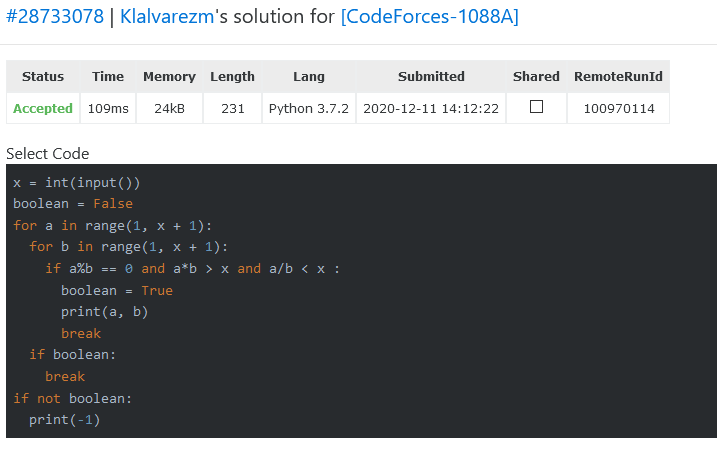

### **a.2)** Using improved search

In [ ]:
x = int(input())  #Same goes here, you need to enter a number.
boolean = False
for b in range(1, x + 1):
  Counter = 1
  
  while b*Counter <= x and Counter < x:
    a = b*Counter
    if a*b > x:
      boolean = True
      print(a, b)
      break
    Counter += 1
  if boolean:
    break
if not boolean:
  print(-1)

10
6 2


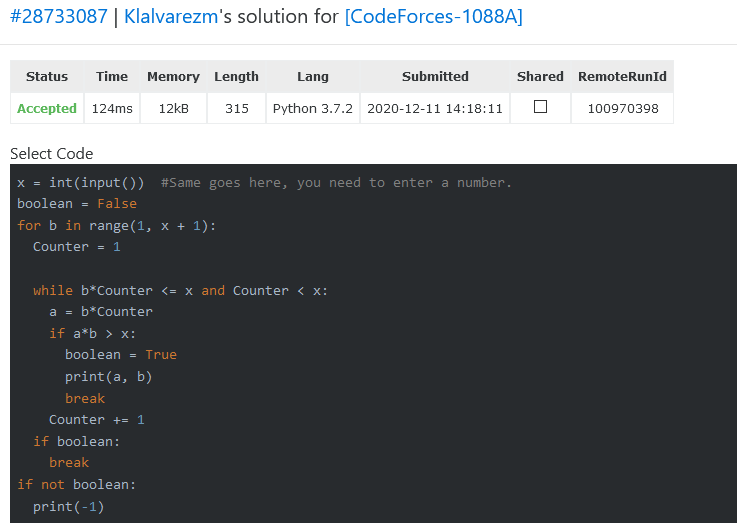

### **a.3)** Using (**x**,**x**)

In [ ]:
value = int(input())
if  1 < value or value < 1:  # Works on 10, no idea on others
  print(value, value)
else:
  print(-1)

10
10 10


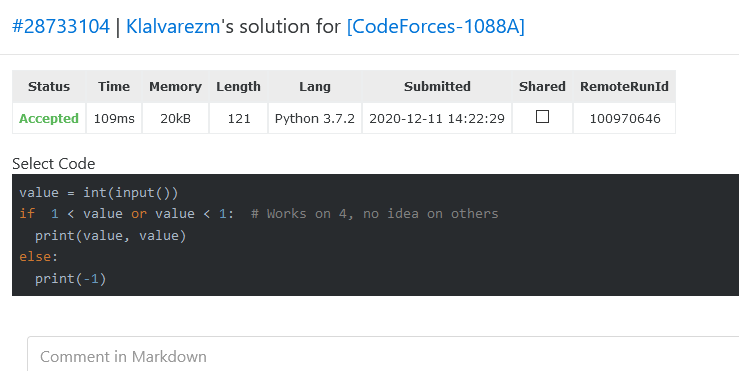

### **a.4)** Using if floor

In [ ]:
Value = int(input())
if Value == 1:
  print(-1)
elif (int(Value/2) + 1) % 2 == 0 :
  print(int(Value/2) + 1, 2)
else:
  print(int(Value/2) + 2, 2)

10
6 2


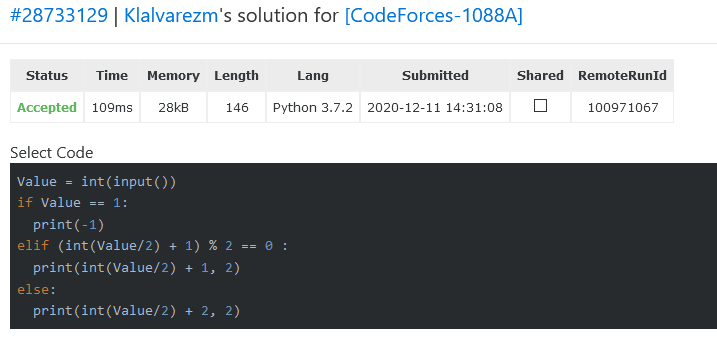

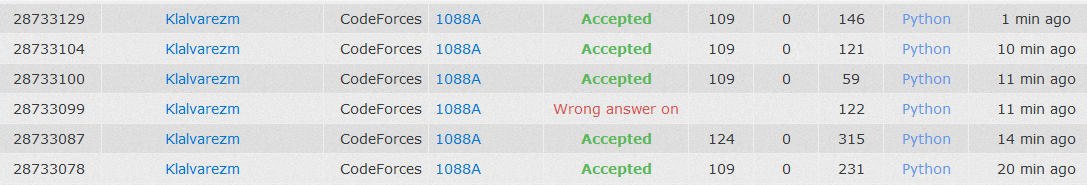

## **b)** Solve the Subset Sum Problem

### **b.1)** Using brute force bruteforce.py
#### Using https://github.com/saltycrane/subset-sum/blob/master/subsetsum/bruteforce.py

In [ ]:
import itertools

def bruteforce(x_list, target):
    possiblities = []
    for x in powerset(x_list):
        possiblities.append((x, sum(x)))

    x_list, actual_value = closest(possiblities, target)

    return (actual_value, x_list)

def powerset(iterable):
    '''powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)
    http://docs.python.org/library/itertools.html#recipes
    '''
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s) + 1))

def closest(possiblities, target):
    '''Modified from http://stackoverflow.com/questions/445782/finding-closest-match-in-collection-of-numbers/445824#445824'''
    return min((abs(target - total), (o_list, total))
               for o_list, total in possiblities)[1]

In [ ]:
import numpy as np
   ##30,50,100,1000]:
for n in [10,20,30]:
  x_list = np.random.randint(100, size=(n))
  target = np.random.randint(1, np.sum(x_list))
  print('n: ', n, "\nsolution: ", bruteforce(x_list, target))

n:  10 
solution:  (231, (31, 71, 80, 49))
n:  20 
solution:  (107, (0, 78, 12, 17))


### For n=10,20,30,50,100,1000 and report when in Colab you run out of memory

### We were unable to proceed up to 30, because all the ram was being used, and the enviroment crashed. So we went up to 20.

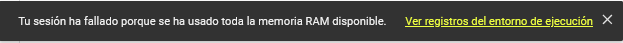

## **c)** Solve the eight queens problem in colab

Given a chessboard, place 8 queens on said 8×8 chessboard so that no two queens threaten each other; thus, a solution requires that no two queens share the same row, column, or diagonal.

In [ ]:
import numpy as np
import copy
##Define empty grid (any size is okay)
grid=[[0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0]]
#or
N=8
grid=np.zeros([N,N],dtype=int)
grid=grid.tolist()

In [ ]:
def possible(grid,yPos,xPos): #Checks if a queen can be put on coordinates y,x?

    l=len(grid) 
  
    for i in range(l): 
        if grid[yPos][i]==1: 
            return False
    for i in range(l):  
        if grid[i][xPos]==1:
            return False
        
    for i in range(l): 
        for j in range(l): 
            if grid[i][j]==1: 
                if abs(i - yPos) == abs(j - xPos): 
                    return False 
    return True 

In [ ]:
def solve(grid):
    
    l=len(grid)   
    
    for y in range(l): 
        for x in range(l): 
            if grid[y][x]==0: 
                if possible(grid,y,x): 
                    grid[y][x]=1 
                    solve(grid) 
                    
                    if sum(sum(a) for a in grid)==l: 
                        return grid 
                    grid[y][x]=0 


    return grid 

In [ ]:
Solution = solve(copy.deepcopy(grid)) 
print(np.matrix(Solution)) 

[[1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]]


### **c.2)** Solve N-Queen Problem.


In [ ]:
import copy
import random

def take_input():
    #Accepts the size of the chess board
    while True:
        try:
            n = int(input('Input size of chessboard? n = '))
            if n <= 3:
                print("Enter a value greater than or equal to 4")
                continue
            return n
        except ValueError:
            print("Invalid value entered. Enter again")

def get_board(n):
    #Returns an n by n board
    board = ["x"]*n
    for i in range(n):
        board[i] = ["x"]*n
    return board

def print_solution(solutions, n):
    #Prints one of the solutions randomly
    x = random.randint(0,len(solutions)-1) #0 and len(solutions)-1 are inclusive
    for row in solutions[x]:
        print(" ".join(row))

def solve(board, col, n):
    #Use backtracking to find all solutions
    if col >= n:
        return
    
    for i in range(n):
        if is_safe(board, i, col, n):
            board[i][col] = "Q"
            if col == n-1:
                add_solution(board)
                board[i][col] = "x"
                return
            solve(board, col+1, n) #recursive call
            #backtrack
            board[i][col] = "x"
            
def is_safe(board, row, col, n):
    #Check if it's safe to place a queen at board[x][y]
    #check row on left side
    for j in range(col):
        if board[row][j] == "Q":
            return False
    
    i, j = row, col
    while i >= 0 and j >= 0:
        if board[i][j] == "Q":
            return False
        i=i-1
        j=j-1
    
    x, y = row,col
    while x < n and y >= 0:
        if board[x][y] == "Q":
            return False
        x=x+1
        y=y-1
    
    return True

def add_solution(board):
    #Saves the board state to the global variable: solutions
    global solutions
    saved_board = copy.deepcopy(board)
    solutions.append(saved_board)

#Taking size of the chessboard from user
n = take_input()

#Returns a square board of nxn dimension
board = get_board(n)

#Empty list of all possible solutions
solutions = []

#Solving using backtracking
solve(board, 0, n)

print()
for i in solutions:
   print("\nOne of the solutions is: \n")
   print_solution(solutions, n)

print()
print("Total number of solutions=", len(solutions))

Input size of chessboard? n = 8


One of the solutions is: 

x x x Q x x x x
x Q x x x x x x
x x x x x x Q x
x x x x Q x x x
Q x x x x x x x
x x x x x x x Q
x x x x x Q x x
x x Q x x x x x

One of the solutions is: 

x x x x Q x x x
x x x x x x Q x
Q x x x x x x x
x x x Q x x x x
x Q x x x x x x
x x x x x x x Q
x x x x x Q x x
x x Q x x x x x

One of the solutions is: 

x x Q x x x x x
x x x x x x x Q
x x x Q x x x x
x x x x x x Q x
Q x x x x x x x
x x x x x Q x x
x Q x x x x x x
x x x x Q x x x

One of the solutions is: 

x x x Q x x x x
x Q x x x x x x
x x x x Q x x x
x x x x x x x Q
x x x x x Q x x
Q x x x x x x x
x x Q x x x x x
x x x x x x Q x

One of the solutions is: 

x x Q x x x x x
x x x x x x Q x
x Q x x x x x x
x x x x x x x Q
x x x x x Q x x
x x x Q x x x x
Q x x x x x x x
x x x x Q x x x

One of the solutions is: 

x x x x x x Q x
x Q x x x x x x
x x x x x Q x x
x x Q x x x x x
Q x x x x x x x
x x x Q x x x x
x x x x x x x Q
x x x x Q x x x

One of the solutions is: 

x x